In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')
data.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
57451,DEBIT,3,4,25.910000,95.970001,Advance shipping,0,37,Electronics,Caguas,...,NaN,825,37,NaN,http://images.acmesports.sports/Bridgestone+e6...,Bridgestone e6 Straight Distance NFL Tennesse,31.990000,0.0,2/18/2017 23:26,Standard Class
57452,DEBIT,3,4,30.570000,117.559998,Advance shipping,0,44,Hunting & Shooting,Caguas,...,NaN,977,44,NaN,http://images.acmesports.sports/ENO+Atlas+Hamm...,ENO Atlas Hammock Straps,29.990000,0.0,1/27/2015 1:53,Standard Class
57453,DEBIT,2,4,-19.670000,98.370003,Advance shipping,0,44,Hunting & Shooting,Caguas,...,NaN,977,44,NaN,http://images.acmesports.sports/ENO+Atlas+Hamm...,ENO Atlas Hammock Straps,29.990000,0.0,2/24/2015 14:59,Standard Class
57454,DEBIT,5,4,88.550003,215.960007,Late delivery,1,3,Baseball & Softball,Caguas,...,NaN,44,3,NaN,http://images.acmesports.sports/adidas+Men%27s...,adidas Men's F10 Messi TRX FG Soccer Cleat,59.990002,0.0,04-05-2015 05:39,Standard Class
57455,DEBIT,5,4,12.000000,399.959992,Late delivery,1,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike,NaN,NaN,NaN,NaN,NaN


In [3]:
# remove categorical columns with high cardinality
cat_low_cardinality = [i for i in data.select_dtypes(include=['object']).columns if data[i].nunique() < 50]

In [4]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [5]:
all_cols = cat_low_cardinality + list(num_cols)

In [6]:
data[all_cols]

,Type,Delivery Status,Category Name,Customer Country,Customer Email,Customer Password,Customer Segment,Customer State,Department Name,Market,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,DEBIT,Advance shipping,Sporting Goods,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fitness,Pacific Asia,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0.0
1,TRANSFER,Late delivery,Sporting Goods,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fitness,Pacific Asia,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0.0
2,CASH,Shipping on time,Sporting Goods,EE. UU.,XXXXXXXXX,XXXXXXXXX,Consumer,CA,Fitness,Pacific Asia,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0.0
3,DEBIT,Advance shipping,Sporting Goods,EE. UU.,XXXXXXXXX,XXXXXXXXX,Home Office,CA,Fitness,Pacific Asia,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0.0
4,PAYMENT,Advance shipping,Sporting Goods,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Corporate,PR,Fitness,Pacific Asia,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57451,DEBIT,Advance shipping,Electronics,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Outdoors,LATAM,...,4,127.959999,95.970001,25.910000,NaN,825,37,NaN,31.990000,0.0
57452,DEBIT,Advance shipping,Hunting & Shooting,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fan Shop,LATAM,...,4,119.959999,117.559998,30.570000,NaN,977,44,NaN,29.990000,0.0
57453,DEBIT,Advance shipping,Hunting & Shooting,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fan Shop,LATAM,...,4,119.959999,98.370003,-19.670000,NaN,977,44,NaN,29.990000,0.0
57454,DEBIT,Late delivery,Baseball & Softball,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,Fitness,LATAM,...,4,239.960007,215.960007,88.550003,NaN,44,3,NaN,59.990002,0.0


In [7]:
for i in data.columns:
  print(i, data[i].nunique())

Type 4
Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 14517
Sales per customer 2596
Delivery Status 4
Late_delivery_risk 2
Category Id 50
Category Name 49
Customer City 563
Customer Country 2
Customer Email 1
Customer Fname 749
Customer Id 13996
Customer Lname 1093
Customer Password 1
Customer Segment 3
Customer State 45
Customer Street 6674
Customer Zipcode 995
Department Id 11
Department Name 11
Latitude 8674
Longitude 3959
Market 5
Order City 3243
Order Country 155
Order Customer Id 13996
order date (DateOrders) 30742
Order Id 30742
Order Item Cardprod Id 116
Order Item Discount 937
Order Item Discount Rate 18
Order Item Id 57456
Order Item Product Price 73
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 189
Order Item Total 2596
Order Profit Per Order 14517
Order Region 23
Order State 1018
Order Status 9
Order Zipcode 520
Product Card Id 116
Product Category Id 50
Product Description 0
Product Image 117
Product Name 116
Product Price 73
Product

In [8]:
pd.crosstab(data['Late_delivery_risk'], data['Delivery Status'])

Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Late_delivery_risk,,,,
0,12541,0,1291,10423
1,0,33201,0,0


In [10]:
if 'Days for shipping (real)' in data and 'Days for shipment (scheduled)':
  data['Shipping_efficiency'] = data['Days for shipment (scheduled)'] / data['Days for shipping (real)']

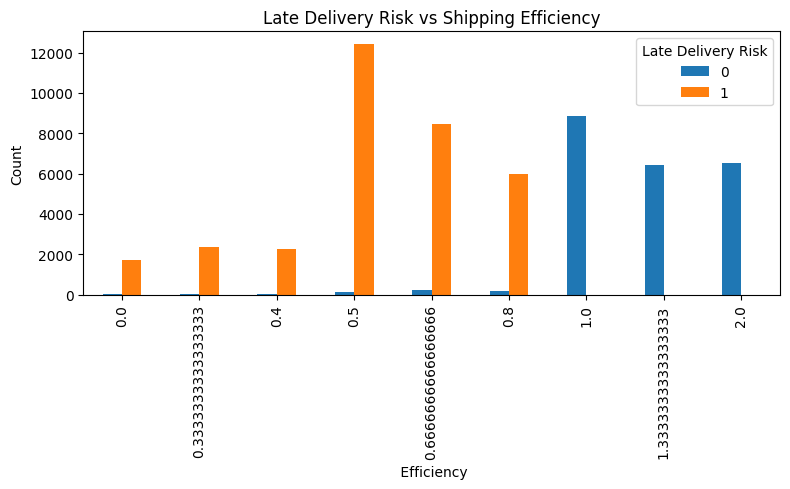

In [11]:
ct = pd.crosstab(data['Late_delivery_risk'], data['Shipping_efficiency'])


ct.T.plot(kind='bar', figsize=(8, 5))
plt.xlabel(' Efficiency')
plt.ylabel('Count')
plt.title('Late Delivery Risk vs Shipping Efficiency')
plt.legend(title='Late Delivery Risk')
plt.tight_layout()
plt.show()


In [12]:
required_columns = [
        'Days for shipping (real)',
        'Days for shipment (scheduled)',
        'Shipping Mode',
        'Order Status',
        'Order Region',
        'Order State',
        'Order Item Quantity',
        'Order Item Discount Rate',
        'Order Item Profit Ratio',
        'Product Price',
        'Category Name',
        'shipping date (DateOrders)',
        'Late_delivery_risk'
]

In [13]:
len(required_columns)

13

In [14]:
new_data = data[required_columns].to_csv('new_data.csv', index=False)

In [15]:
data_final = pd.read_csv('/content/new_data.csv')
data_final.head()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk
0,3,4,Standard Class,COMPLETE,Southeast Asia,Java Occidental,1,0.04,0.29,327.75,Sporting Goods,02-03-2018 22:56,0
1,5,4,Standard Class,PENDING,South Asia,Rajastán,1,0.05,-0.80,327.75,Sporting Goods,1/18/2018 12:27,1
2,4,4,Standard Class,CLOSED,South Asia,Rajastán,1,0.06,-0.80,327.75,Sporting Goods,1/17/2018 12:06,0
3,3,4,Standard Class,COMPLETE,Oceania,Queensland,1,0.07,0.08,327.75,Sporting Goods,1/16/2018 11:45,0
4,2,4,Standard Class,PENDING_PAYMENT,Oceania,Queensland,1,0.09,0.45,327.75,Sporting Goods,1/15/2018 11:24,0


DATA PREPROCESSING

In [16]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57456 entries, 0 to 57455
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Days for shipping (real)       57456 non-null  int64  
 1   Days for shipment (scheduled)  57456 non-null  int64  
 2   Shipping Mode                  57455 non-null  object 
 3   Order Status                   57456 non-null  object 
 4   Order Region                   57456 non-null  object 
 5   Order State                    57456 non-null  object 
 6   Order Item Quantity            57456 non-null  int64  
 7   Order Item Discount Rate       57456 non-null  float64
 8   Order Item Profit Ratio        57456 non-null  float64
 9   Product Price                  57455 non-null  float64
 10  Category Name                  57456 non-null  object 
 11  shipping date (DateOrders)     57455 non-null  object 
 12  Late_delivery_risk             57456 non-null 

In [17]:
data_final.isnull().sum()

,0
Days for shipping (real),0
Days for shipment (scheduled),0
Shipping Mode,1
Order Status,0
Order Region,0
Order State,0
Order Item Quantity,0
Order Item Discount Rate,0
Order Item Profit Ratio,0
Product Price,1


There are no Missing values

In [18]:
data_final.dtypes

,0
Days for shipping (real),int64
Days for shipment (scheduled),int64
Shipping Mode,object
Order Status,object
Order Region,object
Order State,object
Order Item Quantity,int64
Order Item Discount Rate,float64
Order Item Profit Ratio,float64
Product Price,float64


EDA

In [19]:
data_final['Late_delivery_risk'].value_counts()

,count
Late_delivery_risk,
1,33201
0,24255


1 --> Late
0 --> On-time

Delay Rate must be the mean of two

In [20]:
delay_rate = data_final['Late_delivery_risk'].mean()
print(delay_rate)

0.5778508771929824


It tells us that about 55% of all the orders had a late delivery and 45% were on time

In [21]:
data_final.describe()

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Late_delivery_risk
count,57456.000000,57456.000000,57456.000000,57456.000000,57456.000000,57455.000000,57456.000000
mean,3.413586,2.806913,2.226591,0.101810,0.122497,126.133833,0.577851
std,1.637451,1.411379,1.499172,0.070513,0.464688,133.598220,0.493906
min,0.000000,0.000000,1.000000,0.000000,-2.750000,9.990000,0.000000
25%,2.000000,2.000000,1.000000,0.040000,0.080000,50.000000,0.000000
50%,3.000000,4.000000,1.000000,0.100000,0.270000,59.990002,1.000000
75%,5.000000,4.000000,4.000000,0.160000,0.360000,129.990005,1.000000
max,6.000000,4.000000,5.000000,0.250000,0.500000,1999.989990,1.000000


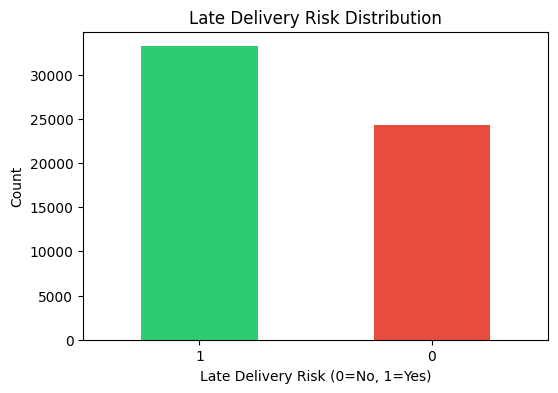

In [22]:
plt.figure(figsize=(6, 4))
data_final['Late_delivery_risk'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Late Delivery Risk Distribution')
plt.xlabel('Late Delivery Risk (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


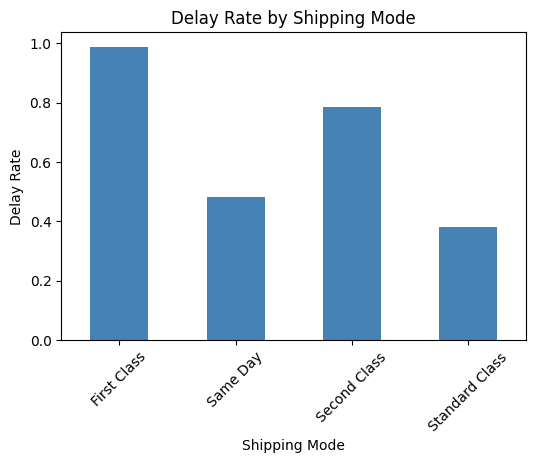

In [23]:
plt.figure(figsize=(6, 4))
shipping_analysis = data_final.groupby('Shipping Mode')['Late_delivery_risk'].mean()
shipping_analysis.plot(kind='bar', color='steelblue')
plt.title('Delay Rate by Shipping Mode')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.show()


ALTHOUGH THE FIRST CLASS MUST HAVE VERY LESS DELAY BUT OVER HERE THERE IS HIGH DELAY IN FIRST CLASS COMAPRED TO STANDARD CLASS WHICH IS LESS OUT OF ALL

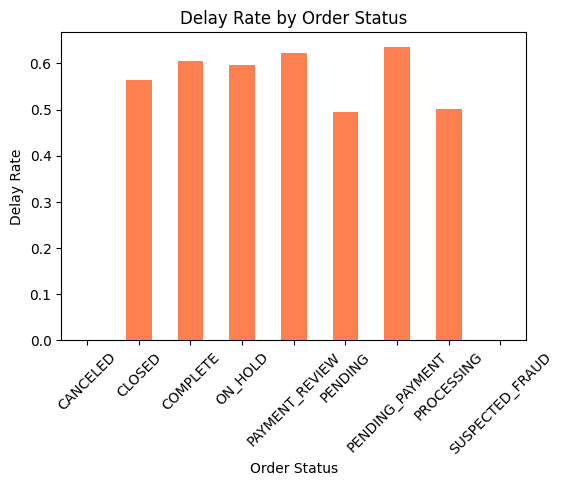

In [24]:
plt.figure(figsize=(6, 4))
status_analysis = data_final.groupby('Order Status')['Late_delivery_risk'].mean()
status_analysis.plot(kind='bar', color='coral')
plt.title('Delay Rate by Order Status')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.show()


DELAYS ARE VERY HIGH FOR ALMOST ALL  THE ORDER STATUSES

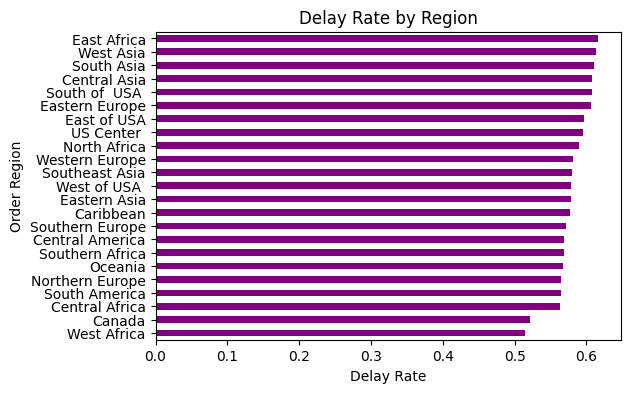

In [25]:
plt.figure(figsize=(6, 4))
region_analysis = data_final.groupby('Order Region')['Late_delivery_risk'].mean().sort_values()
region_analysis.plot(kind='barh', color='purple')
plt.title('Delay Rate by Region')
plt.xlabel('Delay Rate')
plt.show()


VERY REGIONS HAVE SIGNIFICANT DELAYS GREATER THAN 49% DELAYS IN EVERY REGIONS.

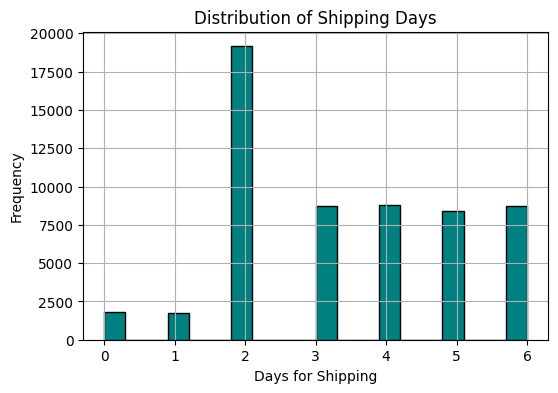

In [26]:
plt.figure(figsize=(6, 4))
data_final['Days for shipping (real)'].hist(bins=20, color='teal', edgecolor='black')
plt.title('Distribution of Shipping Days')
plt.xlabel('Days for Shipping')
plt.ylabel('Frequency')
plt.show()


WE CAN OBSERVE THAT MAJORITY OF ORDERS ARE SHIPPED IN 2 DAYS
SHIPPING TIMES CLUSTER AROUND @ to 6 DAYS WITH MUCH FEWER ORDERS SHIPPED IN 0 or 1 DAY.

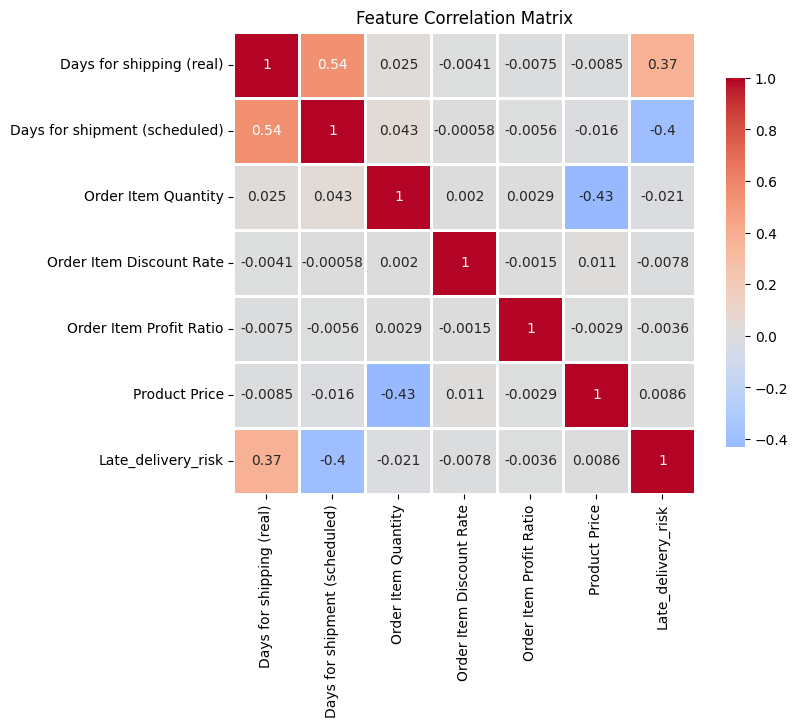

In [27]:
plt.figure(figsize=(8, 6))
numeric_cols = data_final.select_dtypes(include='number').columns
corr_matrix = data_final[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.show()


DAYS FOR SHIPPING(REAL) AND LATE_DELIVERY_RISK HAVE A STRONG CORRELEATION
DAYS FOR SHIPMENT(SCHEDULED) CORRELATES NEGATIVELY WITH THE RISK SUGGESTING THAT ORDERS SCHEDULED FOR LONGER SHIPPING TIME ARE LESS LIKELY TO BE LATE.
OTHERS HAVE VERY LESS OR NO CORRELATION WITHT HE TARGET

**FEATURE ENGINEERING**

In [28]:
data = data_final.copy()

In [29]:
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Shipping Mode', 'Order Status', 'Order Region', 'Order State',
       'Category Name', 'shipping date (DateOrders)'],
      dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
for col in categorical_cols:
  if col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le


In [31]:
if 'Days for shipping (real)' in data and 'Days for shipment (scheduled)':
  data['Shipping_efficiency'] = data['Days for shipment (scheduled)'] / data['Days for shipping (real)']

In [32]:
if 'Product Price' in data.columns:
    data['Price_category'] = pd.cut(data['Product Price'],
                                      bins=[0, 100, 300, 500, float('inf')],
                                      labels=[0, 1, 2, 3])


In [33]:
if 'Order Item Discount Rate' in data.columns:
    data['High_discount_rate'] = (data['Order Item Discount Rate'] > data['Order Item Discount Rate'].median()).astype(int)



In [34]:
data.tail()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk,Shipping_efficiency,Price_category,High_discount_rate
57451,3,4,3,2,12,751,4,0.25,0.27,31.990000,17,18865,0,1.333333,0,1
57452,3,4,3,2,1,841,4,0.02,0.26,29.990000,29,10771,0,1.333333,0,0
57453,2,4,3,2,12,895,4,0.18,-0.20,29.990000,29,19281,0,2.000000,0,1
57454,5,4,3,3,3,904,4,0.10,0.41,59.990002,3,3351,1,0.800000,0,0
57455,5,4,4,3,12,751,4,0.00,0.03,NaN,10,30269,1,0.800000,NaN,0


In [35]:
corr_mat = data.corr()
corr_mat

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk,Shipping_efficiency,Price_category,High_discount_rate
Days for shipping (real),1.000000,0.537778,0.532783,0.031147,0.006209,-0.000081,0.024521,-0.004110,-0.007547,-0.008535,0.004393,-0.003997,0.368362,-0.277097,-0.011191,-0.005464
Days for shipment (scheduled),0.537778,1.000000,0.915137,0.022379,0.002060,-0.001260,0.042789,-0.000579,-0.005613,-0.015784,0.013808,-0.010899,-0.400969,0.659104,-0.017131,-0.001030
Shipping Mode,0.532783,0.915137,1.000000,0.026135,0.004199,-0.002410,0.037759,0.001404,-0.006351,-0.017802,0.013819,-0.012564,-0.440779,0.566678,-0.018026,0.001997
Order Status,0.031147,0.022379,0.026135,1.000000,0.000866,-0.006729,0.045668,-0.000875,-0.009399,-0.031626,0.030824,0.007188,-0.011075,0.003568,-0.031610,0.001063
Order Region,0.006209,0.002060,0.004199,0.000866,1.000000,-0.131570,-0.017563,-0.000158,-0.001536,0.036954,-0.020204,0.182648,0.005537,-0.003218,0.029152,-0.000398
Order State,-0.000081,-0.001260,-0.002410,-0.006729,-0.131570,1.000000,-0.006046,0.003766,-0.000163,-0.006904,0.007840,-0.044003,0.004654,-0.005664,-0.002599,0.001507
Order Item Quantity,0.024521,0.042789,0.037759,0.045668,-0.017563,-0.006046,1.000000,0.001966,0.002869,-0.432345,-0.055644,0.000224,-0.021368,0.027405,-0.591079,0.000049
Order Item Discount Rate,-0.004110,-0.000579,0.001404,-0.000875,-0.000158,0.003766,0.001966,1.000000,-0.001481,0.011167,-0.010290,0.002160,-0.007794,0.004964,0.006607,0.867835
Order Item Profit Ratio,-0.007547,-0.005613,-0.006351,-0.009399,-0.001536,-0.000163,0.002869,-0.001481,1.000000,-0.002900,0.000537,-0.004213,-0.003578,0.003302,-0.003896,-0.000178
Product Price,-0.008535,-0.015784,-0.017802,-0.031626,0.036954,-0.006904,-0.432345,0.011167,-0.002900,1.000000,-0.201148,-0.008753,0.008616,-0.009589,0.840256,0.011144


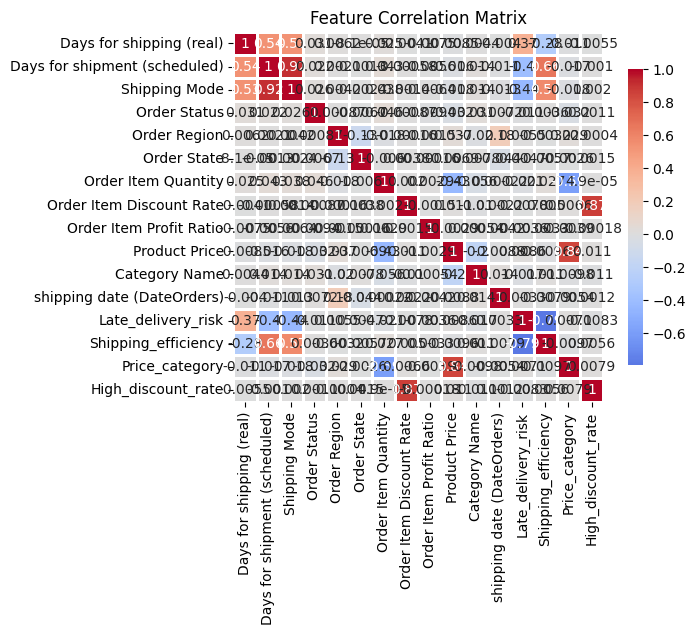

In [36]:
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.show()

In [37]:
X = data.drop('Late_delivery_risk', axis=1)
y = data['Late_delivery_risk']


In [38]:
y.value_counts()

,count
Late_delivery_risk,
1,33201
0,24255


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify = y)


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)


In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression


X_train_scaled_cleaned = np.nan_to_num(X_train_scaled)
X_test_scaled_cleaned = np.nan_to_num(X_test_scaled)

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled_cleaned, y_train)
y_pred_lr = model_lr.predict(X_test_scaled_cleaned)

In [44]:
y_pred_train = model_lr.predict(X_train_scaled_cleaned)
train_accuracy = accuracy_score(y_train,y_pred_train)
print(train_accuracy)

0.9895074467291579


In [45]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.9878169054939955


In [46]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled_cleaned, y_train)
y_pred_rf = model_rf.predict(X_test_scaled_cleaned)

In [47]:
model_rf.feature_importances_.sum()

np.float64(0.9999999999999999)

In [48]:
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))


Shipping_efficiency              0.572500
Days for shipping (real)         0.202253
Days for shipment (scheduled)    0.111005
Shipping Mode                    0.072986
Order Status                     0.031944
shipping date (DateOrders)       0.002183
Order State                      0.001889
Order Item Profit Ratio          0.001343
Order Item Discount Rate         0.000904
Order Region                     0.000822
Product Price                    0.000794
Category Name                    0.000707
Order Item Quantity              0.000428
High_discount_rate               0.000136
Price_category                   0.000105
dtype: float64


In [49]:
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[7067  210]
 [   0 9960]]


TOP LEFT --> TN- On-time deliveries correctly predicted

TOP RIGHT --> FP - ON-Time incorrectly predicited as late.

BOTTOM LEFT --> FN - Late deliveries incorrectly predicted as on-time

BOTTOM RIGHT --> TP - late deliverires correctly predicted


In [50]:
cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
